In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer.pitch import Pitch

In [43]:
df = pd.read_csv(r"C:\Users\George\Documents\Football Analytics\Data\europaFinal.csv")

In [44]:
df = df.loc[df['teamId'] == 'Villarreal']

In [45]:
df = df.loc[df['type'] == 'Pass']

In [46]:
df = df.loc[df['playerId'] == 5.0]

In [47]:
df.x = df.x * 1.2
df.y = df.y * 0.8
df.endX = df.endX * 1.2
df.endY = df.endY * 0.8

In [48]:
df.reset_index(drop=True, inplace=True)

In [49]:
# Use distance formula to calculate distance of each pass
df['beginning'] = np.sqrt(np.square(120-df.x) + np.square(40-df.y))

In [50]:
df['end'] = np.sqrt(np.square(120-df.endX) + np.square(40-df.endY))

In [51]:
df['progressive'] = [(df['end'][x] / df['beginning'][x]) < .75 for x in range(len(df.beginning))]

In [52]:
df = df.loc[df['progressive'] == True].reset_index()

In [53]:
df

,index,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,beginning,end,progressive
0,7,14,38.0,Villarreal,67.68,75.76,FirstHalf,Pass,Successful,5.0,94.32,77.44,63.373180,45.400617,True
1,8,15,13.0,Villarreal,116.40,77.44,FirstHalf,Pass,Successful,5.0,112.32,26.16,37.612679,15.828076,True
2,10,20,41.0,Villarreal,72.00,23.76,FirstHalf,Pass,Unsuccessful,5.0,111.00,51.92,50.672849,14.936077,True
3,11,21,29.0,Villarreal,119.64,79.44,FirstHalf,Pass,Unsuccessful,5.0,114.24,41.92,39.441643,6.071573,True
4,12,22,15.0,Villarreal,119.40,0.40,FirstHalf,Pass,Unsuccessful,5.0,111.36,25.52,39.604545,16.861791,True
5,15,28,52.0,Villarreal,81.36,58.56,FirstHalf,Pass,Successful,5.0,110.64,35.60,42.866341,10.342611,True
6,18,32,12.0,Villarreal,32.76,44.80,FirstHalf,Pass,Successful,5.0,56.88,54.32,87.371950,64.724005,True
7,24,47,4.0,Villarreal,119.40,79.60,FirstHalf,Pass,Unsuccessful,5.0,114.24,40.72,39.604545,5.804826,True
8,42,82,48.0,Villarreal,71.76,56.40,SecondHalf,Pass,Unsuccessful,5.0,109.08,37.36,50.951522,11.234589,True
9,43,91,31.0,Villarreal,74.04,59.12,SecondHalf,Pass,Unsuccessful,5.0,109.08,27.36,49.778469,16.703772,True


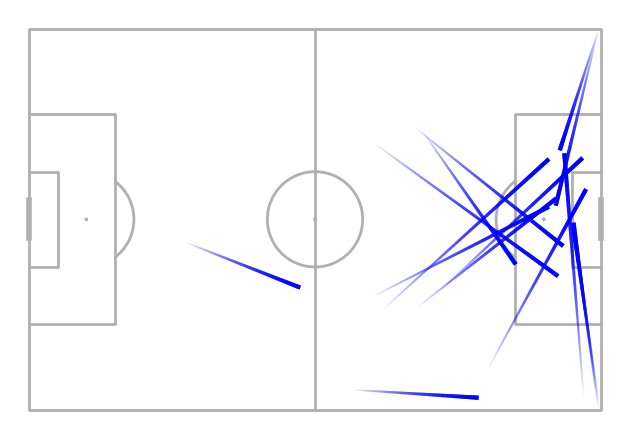

In [55]:
pitch = Pitch(pitch_type='statsbomb')
fig, ax = pitch.draw()

pitch.lines(df.x, df.y, df.endX, df.endY, lw=3, transparent=True, comet=True, ax=ax, color='blue')